In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import yaml
from torch.utils.data import DataLoader
from DataLoader import AfricanWildlifeDataset, show_image, show_pair, show_triple
from DenoisingAE import DenoisingAE, DenoisingAEV1
import torch
import gc
from lightning.pytorch.callbacks import ModelCheckpoint
from lightning import Trainer
from lightning.pytorch.loggers import TensorBoardLogger

best_checkpoint_path_20_v1 = "/home/edoardo/aiproject/tb_logs/denoising_autoencoder_v1/20/checkpoints/epoch=142-step=18876.ckpt"
best_checkpoint_path_10_v1 = "/home/edoardo/aiproject/tb_logs/denoising_autoencoder_v1/10/checkpoints/epoch=70-step=9372.ckpt"
best_checkpoint_path_10_v0 = "/home/edoardo/aiproject/tb_logs/denoising_autoencoder_v0/10_1/checkpoints/epoch=237-step=31416.ckpt"
last_checkpoint_path_10_v0 = "/home/edoardo/aiproject/tb_logs/denoising_autoencoder_v0/10_1/checkpoints/last.ckpt"
torch.cuda.empty_cache()
gc.collect()

22

In [3]:
# from pathlib import Path
# import os

# y = None
# with open(f"{Path.home()}/.config/Ultralytics/settings.yaml") as stream:
#     this_path = os.path.join(os.getcwd(), "aaa")
#     try:
#         y = yaml.safe_load(stream)
#         print(y)
#         y["datasets_dir"] = this_path
#         print(y)
#         # yaml.safe_dump(y, stream)
#     except yaml.YAMLError as exc:
#         print(exc)

# with open(f"{Path.home()}/.config/Ultralytics/settings.yaml", "w") as f:
#     yaml.dump(y, f)

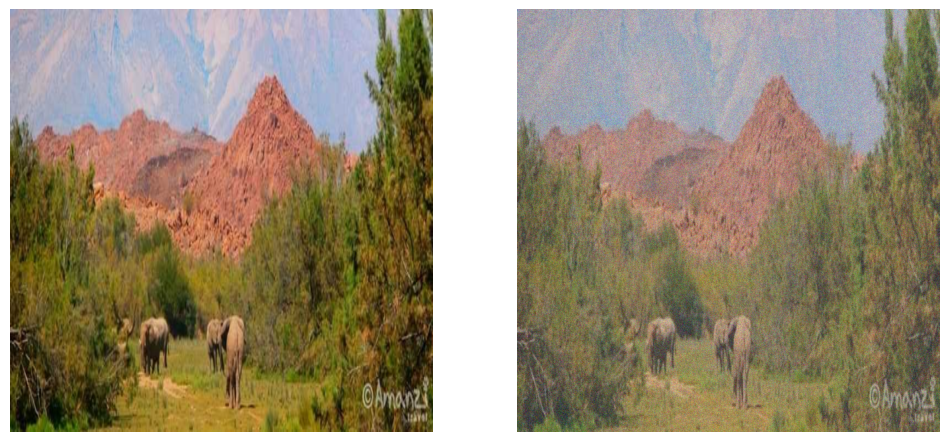

Conv2d(3, 6, kernel_size=(4, 4), stride=(2, 2))
Conv2d(6, 12, kernel_size=(4, 4), stride=(2, 2))

ConvTranspose2d(12, 6, kernel_size=(4, 4), stride=(2, 2))
ConvTranspose2d(6, 3, kernel_size=(4, 4), stride=(2, 2))



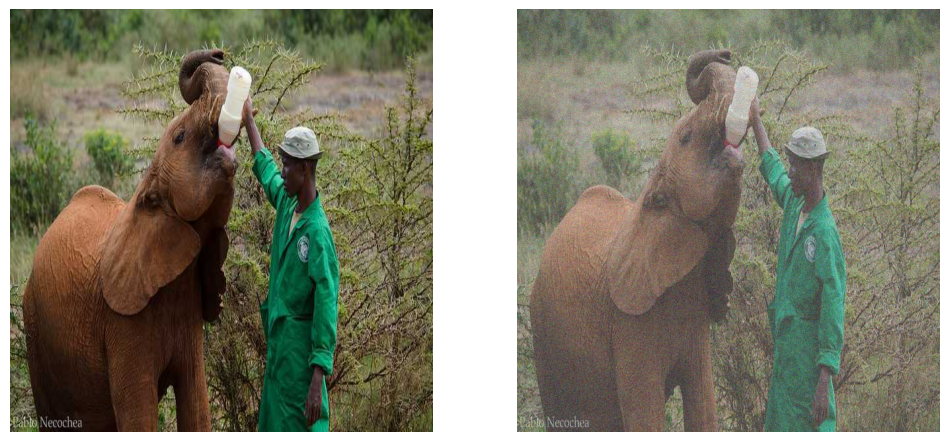

In [4]:
import gin

gin.parse_config_file("config.cfg")

train_dataset = AfricanWildlifeDataset()
val_dataset = AfricanWildlifeDataset(kind="valid")

show_image(train_dataset)

# add_wandb_callback(model, enable_model_checkpointing=True)
# results = model.train(
#     data="african_wildlife.yaml",
#     epochs=20,
#     imgsz=640,
#     # project="aiproject",
# )

# print(results)

img, original = train_dataset[888]
ae = DenoisingAE()
decoded = ae(img)

show_pair(original, img)

In [5]:
train_loader = DataLoader(dataset=train_dataset, batch_size=8, num_workers=16)
val_loader = DataLoader(dataset=val_dataset, batch_size=8)

In [6]:
# %%capture
# logger = TensorBoardLogger("tb_logs", name=f"denoising_autoencoder_{ae.kind}")

# checkpoint_callback = ModelCheckpoint(save_top_k=1, save_last=True, monitor="val_loss")

# trainer = Trainer(logger=logger, max_epochs=300, callbacks=[checkpoint_callback])

# trainer.fit(model=ae, train_dataloaders=train_loader, val_dataloaders=val_loader, ckpt_path=last_checkpoint_path_10_v0)
# %%capture

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Conv2d(3, 6, kernel_size=(4, 4), stride=(2, 2))
Conv2d(6, 12, kernel_size=(4, 4), stride=(2, 2))
Conv2d(12, 24, kernel_size=(4, 4), stride=(2, 2))

ConvTranspose2d(24, 12, kernel_size=(4, 4), stride=(2, 2))
ConvTranspose2d(12, 6, kernel_size=(4, 4), stride=(2, 2))
ConvTranspose2d(6, 3, kernel_size=(4, 4), stride=(2, 2))



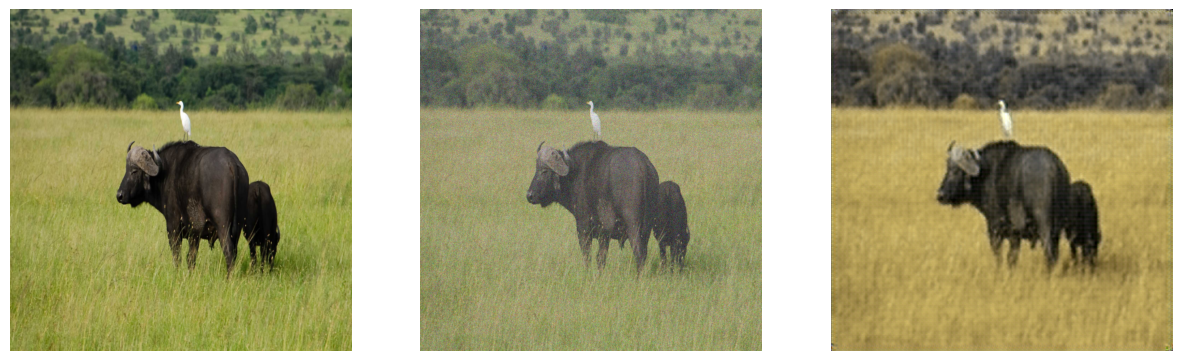

In [28]:
img_to_pick = 66
loaded = DenoisingAEV1.load_from_checkpoint(best_checkpoint_path_10_v1)
loaded.kind = "v1"
img, original = val_dataset[img_to_pick]
decoded2 = loaded(img.to("cuda"))
show_triple(original, img, decoded2.detach().cpu())

# Best

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Conv2d(3, 6, kernel_size=(4, 4), stride=(2, 2))
Conv2d(6, 12, kernel_size=(4, 4), stride=(2, 2))

ConvTranspose2d(12, 6, kernel_size=(4, 4), stride=(2, 2))
ConvTranspose2d(6, 3, kernel_size=(4, 4), stride=(2, 2))



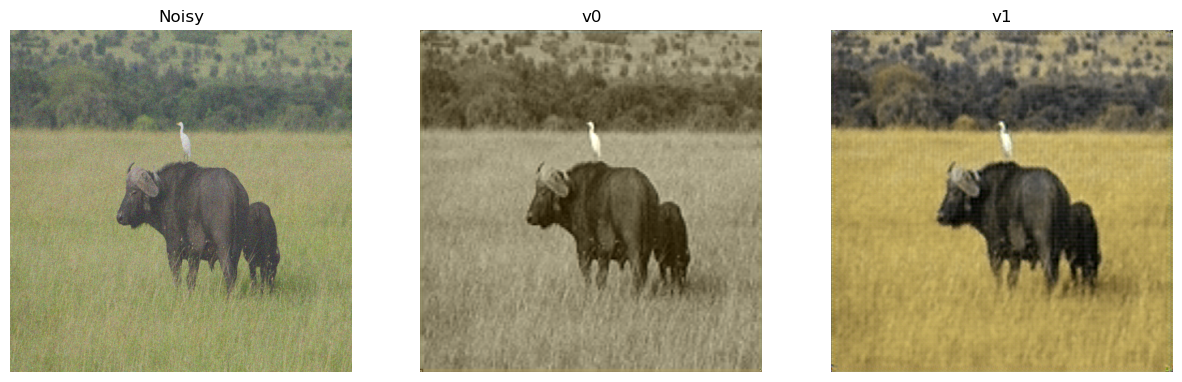

In [29]:
loaded = DenoisingAE.load_from_checkpoint(best_checkpoint_path_10_v0)
img, original = val_dataset[img_to_pick]
decoded3 = loaded(img.to("cuda"))
show_triple(
    img,
    decoded3.detach().cpu(),
    decoded2.detach().cpu(),
    tags=["Noisy", "v0", "v1"],
)